### Imports

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.miscmodels.ordinal_model import OrderedModel

### Q1. What are the primary cultural values associated with trust in political institutions?

In [21]:
wave7_csv = "data/preprocessed/filtered_wave_7.csv"
df = pd.read_csv(wave7_csv, low_memory=False)

In [22]:
g8_codes = [840, 124, 250, 276, 380, 392, 643, 826]
df_g8 = df[df["Country"].isin(g8_codes)]

In [16]:
# Clean / Recode New Variables
valid_conf = [1,2,3,4]
valid_demo = list(range(1, 11))  # 1..10
valid_educ = list(range(0, 9))   # 0..8
valid_income = list(range(1, 11)) # 1..10

df_clean = df_g8[
    df_g8["C Government"].isin(valid_conf) &
    df_g8["C Armed forces"].isin(valid_conf) &
    df_g8["C Police"].isin(valid_conf) &
    df_g8["C Courts"].isin(valid_conf) &
    df_g8["C Political parties"].isin(valid_conf) &
    df_g8["C Civil services"].isin(valid_conf) &
    df_g8["C Television"].isin(valid_conf) &
    df_g8["C Elections"].isin(valid_conf) &
    df_g8["Importance of democracy"].isin(valid_demo) &
    df_g8["Highest educational level"].isin(valid_educ) &
    df_g8["Scale of incomes"].isin(valid_income) &
    (df_g8["Age"] > 0)  # Age must be positive
].copy()

# Now rename columns for convenience
df_clean = df_clean.rename(columns={
    "C Government": "gov_conf",
    "C Armed forces": "armed_conf",
    "C Television": "tv_conf",
    "C Police": "police_conf",
    "C Courts": "courts_conf",
    "C Political parties": "party_conf",
    "C Civil services": "civil_conf",
    "C Elections": "elect_conf",
    "Importance of democracy": "demo_import",
    "Highest educational level": "educ_level",
    "Scale of incomes": "income_scale"
})


In [18]:
# Optionally Scale Only Certain Variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean["Age_scaled"] = scaler.fit_transform(df_clean[["Age"]])
df_clean["demo_import_scaled"] = scaler.fit_transform(df_clean[["demo_import"]])


In [ ]:
df_usa = df_clean[df_clean["Country"] == 840].copy()
print("Number of rows for USA:", len(df_usa))
df_usa.head()

In [19]:
# Fit an Ordered Logit Model
# Ordinal logistic approach with statsmodels
feature_cols = [
    "party_conf", "elect_conf", "armed_conf", "tv_conf",
    "police_conf", "courts_conf", "civil_conf",
    "demo_import", "educ_level", "Age", "income_scale"
]

# Drop any row with NA in these columns (just in case)
df_model = df_clean.dropna(subset=["gov_conf"] + feature_cols)

y = df_model["gov_conf"]  # This must be an integer-coded ordinal
X = df_model[feature_cols]

# Build an OrderedModel with a logit (or probit) link
mod = OrderedModel(
    endog = y,
    exog = X,
    distr = 'logit'  # or 'probit'
)

res = mod.fit(method='bfgs', disp=False)  # bfgs or newton
print(res.summary())


                             OrderedModel Results                             
Dep. Variable:               gov_conf   Log-Likelihood:                -11155.
Model:                   OrderedModel   AIC:                         2.234e+04
Method:            Maximum Likelihood   BIC:                         2.244e+04
Date:                Fri, 24 Jan 2025                                         
Time:                        15:14:02                                         
No. Observations:               11668                                         
Df Residuals:                   11654                                         
Df Model:                          11                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
party_conf       1.4209      0.036     39.251      0.000       1.350       1.492
elect_conf       0.4770      0.028     17.136 

In [87]:
df_usa = df_g8_clean[df_g8_clean["Country"] == 840].copy()
print("Number of rows for USA:", len(df_usa))
df_usa.head()


Number of rows for USA: 2458


,Country,Year,C Armed forces,C Television,C Police,C Courts,C Government,C Political parties,C Civil services,C Elections,Importance of democracy
89769,840,2017,3,2,4,4,4,4,4,4,2
89770,840,2017,2,3,2,2,3,4,4,4,5
89771,840,2017,2,3,2,2,2,3,3,3,1
89772,840,2017,2,3,2,2,4,4,3,4,10
89773,840,2017,2,3,2,2,4,4,4,3,5


In [88]:
df_usa = df_usa.rename(columns={
    "C Government": "gov_conf",        # Dependent variable
    "C Political parties": "party_conf",
    "C Elections": "elect_conf",
    "C Armed forces": "armed_conf",
    "C Television": "tv_conf",
    "C Police": "police_conf",
    "C Courts": "courts_conf",
    "C Civil services": "civil_conf",
    "Importance of democracy": "demo_import"
})


In [89]:
df_usa.head()


,Country,Year,armed_conf,tv_conf,police_conf,courts_conf,gov_conf,party_conf,civil_conf,elect_conf,demo_import
89769,840,2017,3,2,4,4,4,4,4,4,2
89770,840,2017,2,3,2,2,3,4,4,4,5
89771,840,2017,2,3,2,2,2,3,3,3,1
89772,840,2017,2,3,2,2,4,4,3,4,10
89773,840,2017,2,3,2,2,4,4,4,3,5


In [90]:
# Confidence in Government
print("Confidence in Government:")
print(df_usa["gov_conf"].value_counts())

# Confidence in Political Parties
print("\nConfidence in Political Parties:")
print(df_usa["party_conf"].value_counts())

# Importance of democracy
print("\nImportance of democracy:")
print(df_usa["demo_import"].value_counts())


Confidence in Government:
gov_conf
3    951
4    753
2    576
1    178
Name: count, dtype: int64

Confidence in Political Parties:
party_conf
3    1560
4     648
2     215
1      35
Name: count, dtype: int64

Importance of democracy:
demo_import
10    1209
8      313
5      297
9      265
7      146
6      118
4       43
1       29
3       22
2       16
Name: count, dtype: int64


In [91]:
print("\nMean of Confidence in Government (lower is more confident):",
      df_usa["gov_conf"].mean())

print("Median of Confidence in Government:",
      df_usa["gov_conf"].median())



Mean of Confidence in Government (lower is more confident): 2.9271765663140763
Median of Confidence in Government: 3.0


             gov_conf  party_conf  elect_conf  armed_conf   tv_conf  \
gov_conf     1.000000    0.352513    0.305359    0.433204 -0.000224   
party_conf   0.352513    1.000000    0.375711    0.187305  0.327786   
elect_conf   0.305359    0.375711    1.000000    0.244701  0.257505   
armed_conf   0.433204    0.187305    0.244701    1.000000  0.137494   
tv_conf     -0.000224    0.327786    0.257505    0.137494  1.000000   
police_conf  0.440429    0.235989    0.330250    0.534585  0.160240   
courts_conf  0.247854    0.284389    0.418273    0.307072  0.302309   
civil_conf   0.174257    0.403489    0.430146    0.218449  0.289981   
demo_import  0.047803    0.011657   -0.216867   -0.109208 -0.046396   

             police_conf  courts_conf  civil_conf  demo_import  
gov_conf        0.440429     0.247854    0.174257     0.047803  
party_conf      0.235989     0.284389    0.403489     0.011657  
elect_conf      0.330250     0.418273    0.430146    -0.216867  
armed_conf      0.534585     

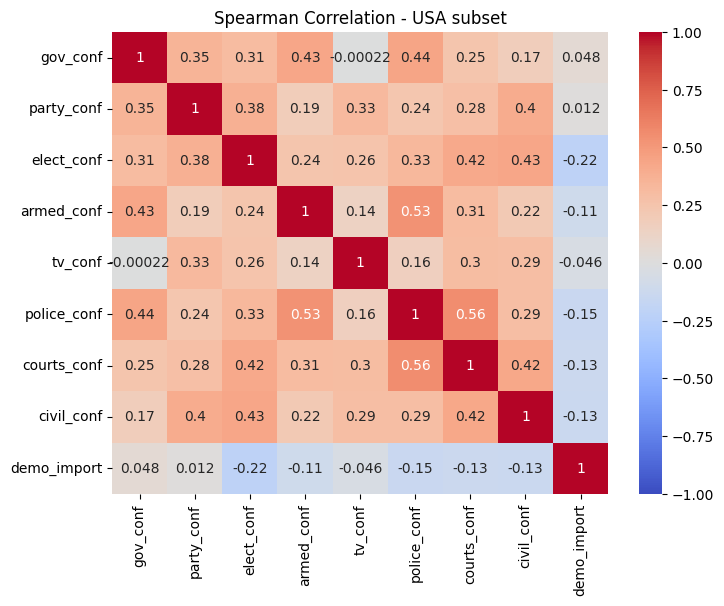

In [92]:
# Subset the columns for correlation
cols_of_interest = [
    "gov_conf",
    "party_conf",
    "elect_conf",
    "armed_conf",
    "tv_conf",
    "police_conf",
    "courts_conf",
    "civil_conf",
    "demo_import",
]

corr_matrix = df_usa[cols_of_interest].corr(method="spearman")
print(corr_matrix)

# Optional: visualize with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman Correlation - USA subset")
plt.show()


In [93]:
import statsmodels.formula.api as smf

# Define the formula: gov_conf ~ all other columns
formula_all = (
    "gov_conf ~ party_conf + elect_conf + armed_conf + tv_conf "
    "+ police_conf + courts_conf + civil_conf + demo_import"
)

model_all = smf.ols(formula_all, data=df_usa).fit()
print(model_all.summary())


                            OLS Regression Results                            
Dep. Variable:               gov_conf   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     173.6
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          1.67e-232
Time:                        18:16:41   Log-Likelihood:                -2699.2
No. Observations:                2458   AIC:                             5416.
Df Residuals:                    2449   BIC:                             5469.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4949      0.113      4.380      

### Q2. How does trust in political institutions compare across countries?

In [94]:
wave7_csv = "data/preprocessed/filtered_wave_7.csv"
wave7_q2 = pd.read_csv(wave7_csv, low_memory=False)

### Q3. How has trust in political institutions evolved from 2017 to 2022 and over the entire time span?

### BONUS